<a href="https://colab.research.google.com/github/diptaban/MultiLayerPerceptron/blob/main/MLP_withBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Layer Perceptron

**XOR or XNOR Classification problem**

 

1.    The $X$, containing the training examples, should be written in $n\times m$ format, where $n$ = no. of features and $m$ = no. of samples/examples.
2.   Define sigmoid function and its derivative:

##$g(z) = \frac{1}{1+exp(-z)} $

## $g^{'}(z) = g(z)(1-g(z))$

3. Compute Cost : 

## $J = -\frac{1}{m} \sum_{i=1}^m \{ y^{i} \cdot log(\hat{y}^{i}) + (1-y^{i})
\cdot  log(1-\hat{y}^{i}) \}$
 

4. Initialization of Weights

5. Forward Propagation
# $Forward \quad Propagation$
## $ Z^{[1]} = W^{[1]}X + b^{[1]}$
## $ A^{[1]} = g^{[1]}(Z^{[1]})$
## $ Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$
## $ A^{[2]} = g^{[2]}(Z^{[2]})$

*We can use different activation functions in different layers*. Say $g^{[1]}$ is $tanh$ and $g^{[2]}$ is $sigmoid$

6. # Back Propagation
*Remember : Shape of X is $n_x\times m$, Shape of Y is $1\times m$*

$X_{n_x\times m}, Y_{1\times m}$


\begin{eqnarray}
 dZ^{[2]} &=& A^{[2]} - Y \\
 dW^{[2]} &=& \frac{1}{m} dZ^{[2]} A^{[1]^T} \\
 db^{[2]} &=& \frac{1}{m} np.sum( dZ^{[2]},axis=1,keepdims=True)\\
 dZ^{[1]} &=& W^{[2]^T} dZ^{[2]} \quad \cdot \quad g^{'[1]}(Z^{[1]}\\
 dW^{[1]} &=& dZ^{[1]} X^T \\
 db^{[1]} &=& \frac{1}{m} np.sum( dZ^{[1]},axis=1,keepdims=True)\\
\end{eqnarray}


(2, 4)
4
[[0.9953047  0.00591332 0.00246908 0.99611212]]
(20000,)


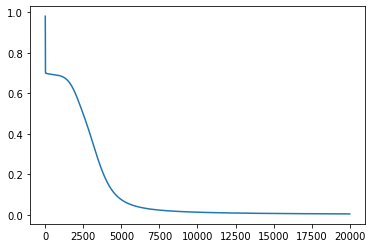

In [ ]:
import numpy as np

def sigmoid(x): # Returns values that sums to one.
    return 1 / (1 + np.exp(-x)) 

def sigmoid_derivative(x):
    return np.exp(-x)/(np.exp(-x)+1)**2

def cost_computation(y,yhat):
  logprobs = -(1/m)* np.sum(( np.multiply(y,np.log(yhat)) + np.multiply(1-y,np.log(1-yhat)) ))
  #yhat = yhat.T # if we use np.dot we need transpose
  #logprobs = -(1/m) * (  np.dot(y,np.log(yhat)) + np.dot((1-y),np.log(1-yhat))   )
  return logprobs

lr = 0.1 # proper learning rate and iteration is very important to get optimal weight

xor_input = np.array([[0,0], [0,1], [1,0], [1,1]])
xor_output = np.array([[1,0,0,1]])
# no. of examples = m = 4, no. of features =n=2
# So dimension of X matrix should be (n x m) i.e. 2 x 4
# Lets drop the last row of data and use that as unseen test.
X = xor_input.T
Y = xor_output
print(X.shape)
output_dim = len(Y.T)
print(output_dim)
# Define the shape of the weight vector.
n0, m = X.shape
# We use one hidden layer
# So we have two weight matrices W1 and W2, two bias vectors b1 and b2
# dimension of W1 should be n1 x n0, where n1 = no. of nodes in hidden layer, n0 = no. of nodes in input layer, i.e. features of X
# dimension of b1 = n1 x 1
# we choose n1 = 5
n1 = 5
W1 = np.random.random((n1,n0))
b1 = np.zeros((n1,1))
# dimension of W2 = n2 x n1 , where, n2 = total no. of nodes in second hidden layer, here, second hidden layer = output layer
n2 = 1
W2 = np.random.random((n2,n1))
b2 = np.zeros((n2,1))

NumOfEpochs = 20000
Cost = []

for epoch in range(NumOfEpochs):
  # Forward propagation
  Z1 = np.dot(W1,X) + b1
  A1 = sigmoid(Z1)
  #A1 = np.tanh(Z1)
  Z2 = np.dot(W2,A1) +b2
  A2 = sigmoid(Z2)

  Cost.append(np.squeeze(cost_computation(Y,A2)))
  #print(A2)

  # Back propagation
  dZ2 = A2 - Y
  dW2 = (1/m) * np.dot(dZ2,A1.T)
  db2 = np.sum(dZ2,axis=1,keepdims=True)
  dZ1 = np.multiply(np.dot(W2.T, dZ2), (A1*(1-A1))) # for sigmoid function
  #dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2)) # for tanh activation
  
  dW1 = (1/m) *np.dot(dZ1,X.T)
  db1 = (1/m) * np.sum(dZ1,axis=1,keepdims = True)

  W1 = W1 - lr * dW1
  W2 = W2 - lr * dW2
  b1 = b1 - lr * db1
  b2 = b2 - lr * db2


print(A2)

def predict(W1,W2,b1,b2, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    
    Z1 = np.dot(W1,X) + b1
    A1 = sigmoid(Z1)
    #A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) +b2
    A2 = sigmoid(Z2)
    predictions = np.round(A2)
    
    
    return predictions


import matplotlib.pyplot as plt
Cost = np.array(Cost)
print(Cost.shape)
plt.plot(Cost)


In [ ]:
print(Y)
print(A2)
print(np.squeeze(cost_computation(Y,A2.T)))


[[1 0 0 1]]
[[0.99510922 0.00537893 0.00306161 0.99614328]]
10.954824383315492


[[0 0 1 1]
 [0 1 0 1]]
(1, 2500)
(50, 50)
[[1 0 0 1]]


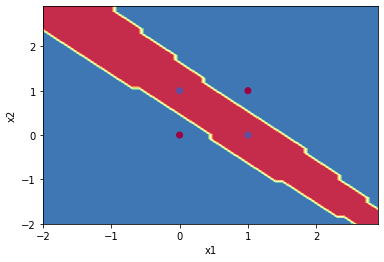

In [ ]:
 # Plotting Decision Boundary
 
 # Set min and max values and give it some padding
x_min, x_max = X[0, :].min() -2 , X[0, :].max() + 2
y_min, y_max = X[1, :].min() -2, X[1, :].max() + 2
h = 0.1
print(X)
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid

Xn = (np.c_[xx.ravel(),yy.ravel()]).T

P = predict(W1,W2,b1,b2,Xn)
print(P.shape)
P = P.reshape(xx.shape)
print(P.shape)
t = [1, 10,10, 1]
plt.contourf(xx, yy, P, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[0, :], X[1, :], c = t, cmap=plt.cm.Spectral)
print(Y)

# Neural Network with Back propagation for Nonlinear Dataset



1.   ## Planar Dataset
2.  ## Noisy Circular dataset

## Here at first we load the data set

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model


def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

## Check dataset

(2, 400)
(1, 400)


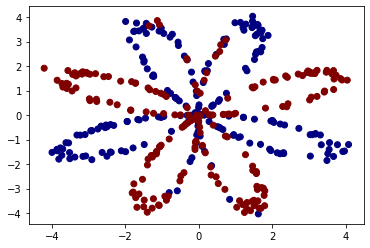

In [ ]:
X,Y = load_planar_dataset()
print(X.shape) # X should be in shape (n x m)
print(Y.shape) # Y should be in shape (1 x m)
# m = no. of samples
# n = no. of features

plt.scatter(X[0,:],X[1,:],c=Y,cmap='jet')

# Defining Neural Network Structure



1.   ## We consider one hidden layer
2.   ## n_x = no. of nodes or units in input layer
3.   ## n_h = no. of units in hidden layer
4.   ## n_y = no. of units in output layer



In [ ]:
def layer_sizes(X,Y):
  n_x = X.shape[0] # no. of features
  n_h = 4
  n_y = Y.shape[0]
  return (n_x,n_h,n_y)

# Initialization of Parameters

## save the parameters in a dictionary named 'parameters' 

In [ ]:
def initialize_parameters(n_x,n_h,n_y):
  W1 = np.random.random((n_h,n_x)) *0.01
  b1 = np.zeros((n_h,1))
  W2 = np.random.random((n_y,n_h)) *0.01
  b2 = np.zeros((n_y,1))

  # make sure that shapes are right
  assert (W1.shape == (n_h, n_x))
  assert (b1.shape == (n_h, 1))
  assert (W2.shape == (n_y, n_h))
  assert (b2.shape == (n_y, 1))

  parameters = {"W1":W1,"b1":b1, "W2":W2,"b2":b2}
  return parameters


# $Forward \quad Propagation$
## $ Z^{[1]} = W^{[1]}X + b^{[1]}$
## $ A^{[1]} = g^{[1]}(Z^{[1]})$
## $ Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$
## $ A^{[2]} = g^{[2]}(Z^{[2]})$

##*We can use different activation functions in different layers*. Say $g^{[1]}$ is $tanh$ and $g^{[2]}$ is $sigmoid$

In [ ]:
def forward_propagation(X,parameters):
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']

  Z1 = np.dot(W1,X) + b1
  A1 = sigmoid(Z1)
  #A1 = np.tanh(Z1)
  Z2 = np.dot(W2,A1) +b2
  A2 = sigmoid(Z2)

  cache ={"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2}
  return A2,cache

Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Exercise**: Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(you can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).

In [ ]:
def compute_cost(y,yhat):
  logprobs = -(1/m)* np.sum(( np.multiply(y,np.log(yhat)) + np.multiply(1-y,np.log(1-yhat)) ))
  #yhat = yhat.T # if we use np.dot we need transpose
  #logprobs = -(1/m) * (  np.dot(y,np.log(yhat)) + np.dot((1-y),np.log(1-yhat))   )
  cost = np.squeeze(logprobs) # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
  return cost


# Back Propagation
*Remember : Shape of X is $n_x\times m$, Shape of Y is $1\times m$*

$X_{n_x\times m}, Y_{1\times m}$


\begin{eqnarray}
dZ^{[2]} &=& A^{[2]} - Y \\
 dW^{[2]} &=& \frac{1}{m} dZ^{[2]} A^{[1]^T} = \frac{1}{m} (A^{[2]} - Y) A^{[1]^T} \\
 db^{[2]} &=& \frac{1}{m} np.sum( dZ^{[2]},axis=1,keepdims=True)\\
 dZ^{[1]} &=& W^{[2]^T} dZ^{[2]} \cdot  g^{'[1]}(Z^{[1]}) = W^{[2]^T} (A^{[2]} - Y) \cdot  g^{'[1]}(Z^{[1]})\\
 dW^{[1]} &=& dZ^{[1]} X^T \\
 db^{[1]} &=& \frac{1}{m} np.sum( dZ^{[1]},axis=1,keepdims=True)\\
\end{eqnarray}

In [ ]:
def back_propagation(X,Y,parameters,cache):
  m = X.shape[1]
    
  # First, retrieve W1 and W2 from the dictionary "parameters".
  
  W1 = parameters['W1']
  W2 = parameters['W2']
  ### END CODE HERE ###
      
  # Retrieve also A1 and A2 from dictionary "cache".
  
  A1 = cache['A1']
  A2 = cache['A2']
  ### END CODE HERE ###
  
  # Backward propagation: calculate dW1, db1, dW2, db2. 
  
  dZ2 = A2 - Y
  dW2 = (1 / m) * np.dot(dZ2, A1.T)
  db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
  #dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2)) # for tanh activation
  dZ1 = np.multiply(np.dot(W2.T, dZ2), (A1*(1-A1))) # for sigmoid function
  dW1 = (1 / m) * np.dot(dZ1, X.T)
  db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
  ### END CODE HERE ###
    
  grads = {"dW1": dW1,
            "db1": db1,
            "dW2": dW2,
            "db2": db2}
  
  return grads

# Update the parameters

\begin{equation*}
\boxed{\Theta := \Theta - \alpha \cdot \frac{\partial J(\Theta}{\partial \Theta}}
\end{equation*}


\begin{eqnarray}
W^{[1]} &=& W^{[1]} - \alpha \cdot dW^{[1]}\\
W^{[2]} &=& W^{[2]} - \alpha \cdot dW^{[2]}\\
b^{[1]} &=& b^{[1]} - \alpha \cdot db^{[1]}\\
b^{[2]} &=& b^{[1]} - \alpha \cdot db^{[2]}\\
\end{eqnarray}

*Points to remember* : 
\begin{align}
dW^{[1]} = \frac{\partial J}{\partial W^{[1]}} \\
dW^{[2]} = \frac{\partial J}{\partial W^{[2]}} \\
db^{[1]} = \frac{\partial J}{\partial b^{[1]}} \\
db^{[2]} = \frac{\partial J}{\partial b^{[2]}}
\end{align}

In [ ]:
def update_parameters(parameters, grads, lr = 1.2):
  W1 = parameters["W1"]
  W2 = parameters["W2"]
  b1 = parameters["b1"]
  b2 = parameters["b2"]

  dW1 = grads["dW1"]
  dW2 = grads["dW2"]
  db1 = grads["db1"]
  db2 = grads["db2"]
  
  W1 = W1 - lr * dW1
  W2 = W2 - lr * dW2
  b1 = b1 - lr * db1
  b2 = b2 - lr * db2

  parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
  return parameters


# Putting All together

In [ ]:
def nn_model(X,Y, n_h, no_of_iterations, print_cost = False):
  n_x = layer_sizes(X, Y)[0]
  n_y = layer_sizes(X, Y)[2]
  n_h = 5
  parameters = initialize_parameters(n_x,n_h,n_y)
  

  for epoch in range(0,no_of_iterations):
    A2,cache = forward_propagation(X,parameters)
    cost = compute_cost(Y,A2)
    grads = back_propagation(X,Y,parameters,cache)
    parameters = update_parameters(parameters,grads,lr=0.2)
    if print_cost and epoch % 1000 == 0:
            print ("Cost after iteration %i: %f" % (epoch, cost))

  return parameters



# Prediction

In [ ]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
   
    
    return predictions

In [ ]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [ ]:
## Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, no_of_iterations=100000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

# Notes on Back propagation

Images can be represented as a matrix with number of elements equal to the number of pixels. However, color images are digitally represented as a volume (i.e., three-channels; or three matrices stacked on each other). The number three is used because colors are represented as red-green-blue (RGB) values. In the diagram below, we have a 64×64×3 image containing a soccer ball. It is flattened into a single vector containing 12,288 elements.

https://aman.ai/cs229/assets/neural-networks/4.jpg

A neural network model consists of two components:
The network architecture, which defines how many layers, how many neurons, and how the neurons are connected and,
The parameters (values; also known as weights). In this section, we will talk about how to learn the parameters. First we will talk about parameter initialization, optimization and analyzing these parameters.
Parameter Initialization
Consider a two layer neural network. On the left, the input is a flattened image vector $x^{(1)},…,x^{(i)}_n$. In the first hidden layer, notice how all inputs are connected to all neurons in the next layer. This is called a fully connected layer.

https://aman.ai/cs229/assets/neural-networks/5.jpg

The next step is to compute how many parameters are in this network. One way of doing this is to compute the forward propagation by hand.

\begin{aligned}
z^{[1]} &=W^{[1]} x^{(i)}+b^{[1]} \\
a^{[1]} &=g\left(z^{[1]}\right) \\
z^{[2]} &=W^{[2]} a^{[1]}+b^{[2]} \\
a^{[2]} &=g\left(z^{[2]}\right) \\
\end{aligned}

$z^{[3]}=W^{[3]} a^{[2]}+b^{[3]} \\
\tag{3}$

$\hat{y}^{(i)} =a^{[3]}=g\left(z^{[3]}\right)
\tag{4}$

We know that $z^{[1]},a^{[1]}∈ℝ^{3×1}$ and $z^{[2]},a^{[2]}∈ℝ^{2×1} $and $z^{[3]},a^{[3]}∈ℝ^{1×1}$. As of now, we do not know the size of $W^{[1]}$. However, we can compute its size. We know that $x∈ℝ^{n×1}$. This leads us to the following:

$z^{[1]}=W^{[1]} x^{(i)}=\mathbb{R}^{3 \times 1} \\
\text{Written as sizes: }\mathbb{R}^{3 \times 1}=\mathbb{R}^{? \times ?} \times \mathbb{R}^{n \times 1}$

\begin{aligned}
\frac{\partial \mathcal{L}}{\partial W^{[3]}} 
&=-\frac{\partial}{\partial W^{[3]}}((1-y) \log (1-\hat{y})+y \log \hat{y}) \\ 
&=-(1-y) \frac{\partial}{\partial W^{[3]}} \log \left(1-g\left(W^{[3]} a^{[2]}+b^{[3]}\right)\right)-y \frac{\partial}{\partial W^{[3]}} \log \left(g\left(W^{[3]} a^{[2]}+b^{[3]}\right)\right) \\
&=-(1-y) \frac{1}{1-g\left(W^{[3]} a^{[2]}+b^{[3]}\right)}(-1) g^{\prime}\left(W^{[3]} a^{[2]}+b^{[3]}\right) a^{[2]^{T}} \\
&{\text{ }}- y \frac{1}{g\left(W^{[3]} a^{[2]}+b^{[3]}\right)} g^{\prime}\left(W^{[3]} a^{[2]}+b^{[3]}\right) a^{[2]^{T}} \\
&=(1-y) \sigma\left(W^{[3]} a^{[2]}+b^{[3]}\right) a^{[2]^{T}}-y\left(1-\sigma\left(W^{[3]} a^{[2]}+b^{[3]}\right)\right) a^{[2]^{T}} \\
&=(1-y) a^{[3]} a^{[2]^{T}}-y\left(1-a^{[3]}\right) a^{[2]^{T}} \\
&=\left(a^{[3]}-y\right) a^{[2]^{T}}
\end{aligned}